In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iterativeClustering import clusterings_with_hors, bfs_merge
from cluster import build_distance_matrix, distance_values, get_seq_as_txt
from Bio import SeqIO
from Bio import Phylo
import json
from showHOR import show_hor, show_hors, show_hor_tree

In [2]:
seq_record = SeqIO.read("./data/vitis/chr2_1916902-2002902.fasta", "fasta")
input_seq = str(seq_record.seq)

In [3]:
monomer_size = 107
dna_seqs = [input_seq[sq_index * monomer_size : (sq_index + 1) * monomer_size] for sq_index in range(len(input_seq) // monomer_size)]

In [4]:
dna_seq_dists = build_distance_matrix(dna_seqs)

(array([2.8200e+02, 3.2000e+01, 5.5000e+01, 3.2000e+01, 5.7000e+01,
        8.5000e+01, 1.5200e+02, 1.7700e+02, 3.8600e+02, 2.3400e+02,
        4.4800e+02, 3.8500e+02, 8.4400e+02, 1.0220e+03, 1.3240e+03,
        1.4940e+03, 1.8910e+03, 2.0050e+03, 2.3660e+03, 2.5360e+03,
        3.0220e+03, 3.1570e+03, 3.3120e+03, 2.9950e+03, 3.3990e+03,
        3.0750e+03, 3.5420e+03, 3.3920e+03, 3.4360e+03, 3.5070e+03,
        3.6830e+03, 3.7980e+03, 3.8950e+03, 3.9490e+03, 3.9860e+03,
        4.2640e+03, 4.0510e+03, 4.3210e+03, 4.4910e+03, 4.5220e+03,
        4.8830e+03, 5.0930e+03, 5.9240e+03, 7.2030e+03, 8.1680e+03,
        9.4480e+03, 1.1028e+04, 1.2830e+04, 1.4830e+04, 1.6637e+04,
        1.8384e+04, 1.9636e+04, 1.9702e+04, 1.9518e+04, 1.7894e+04,
        1.5197e+04, 1.1121e+04, 6.8580e+03, 3.6640e+03, 1.7910e+03,
        1.0350e+03, 6.6300e+02, 4.1100e+02, 2.6800e+02, 1.4200e+02,
        5.3000e+01, 1.5000e+01, 3.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12

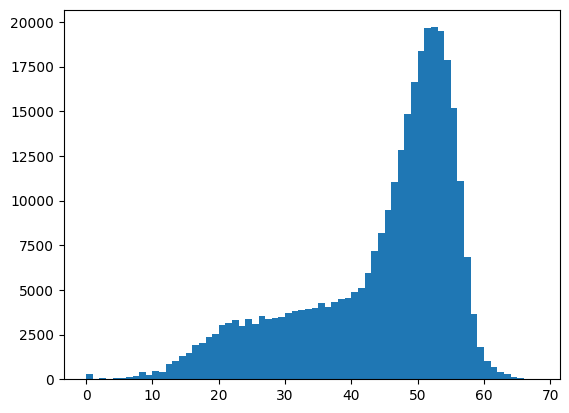

In [5]:
dist_values = distance_values(dna_seq_dists)
plt.hist(dist_values, bins=int(max(dist_values)))


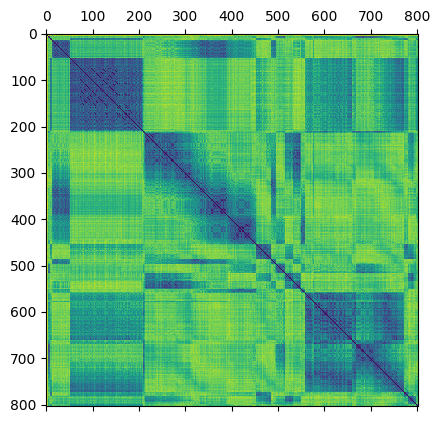

In [6]:
plt.matshow(dna_seq_dists)

In [7]:
# plt.matshow(matrix_closure(dna_seq_dists<=4))

In [8]:
clusterings, tree, hors, hor_tree_root = clusterings_with_hors(dna_seq_dists,min_len_loop=1,min_loop_reps=5)

Start of clusterings_with_hors
merge_clusters with distance as (803, 803), clusters as (), and max distance 0
adjacency triu sparsity is 0.9995626611911435
merge_clusters with distance as (704, 704), clusters as (704, 803), and max distance 1
adjacency triu sparsity is 0.9999616638688017
merge_clusters with distance as (685, 685), clusters as (685, 803), and max distance 2
adjacency triu sparsity is 0.9999488518301455
merge_clusters with distance as (661, 661), clusters as (661, 803), and max distance 3
adjacency triu sparsity is 0.9999542251345209
merge_clusters with distance as (641, 641), clusters as (641, 803), and max distance 4
adjacency triu sparsity is 0.9999318537484089
merge_clusters with distance as (613, 613), clusters as (613, 803), and max distance 5
adjacency triu sparsity is 0.999906857670537
merge_clusters with distance as (578, 578), clusters as (578, 803), and max distance 6
adjacency triu sparsity is 0.9997455729696723
merge_clusters with distance as (494, 494), clu

In [9]:
clusterings_simple = clusterings_with_hors(dna_seq_dists,min_len_loop=1,require_increasing_loop_coverage=False,
        require_relevant_loop_coverage=False, build_tree=False, order_clusters=True)

Start of clusterings_with_hors
merge_clusters with distance as (803, 803), clusters as (), and max distance 0
adjacency triu sparsity is 0.9995626611911435
merge_clusters with distance as (704, 704), clusters as (704, 803), and max distance 1
adjacency triu sparsity is 0.9999616638688017
merge_clusters with distance as (685, 685), clusters as (685, 803), and max distance 2
adjacency triu sparsity is 0.9999488518301455
merge_clusters with distance as (661, 661), clusters as (661, 803), and max distance 3
adjacency triu sparsity is 0.9999542251345209
merge_clusters with distance as (641, 641), clusters as (641, 803), and max distance 4
adjacency triu sparsity is 0.9999318537484089
merge_clusters with distance as (613, 613), clusters as (613, 803), and max distance 5
adjacency triu sparsity is 0.999906857670537
merge_clusters with distance as (578, 578), clusters as (578, 803), and max distance 6
adjacency triu sparsity is 0.9997455729696723
merge_clusters with distance as (494, 494), clu

In [10]:
[
    [str(loop)
    for loop in clustering.loops]
    for clustering in clusterings
]

[['P in [17:22]',
  'Q in [254:264],[268:277],[279:284],[540:545]',
  'WfgWWWffhWWW in [73:156]',
  'p in [579:586],[587:594],[596:610],[614:630],[632:638],[641:648],[651:660],[662:669],[715:721],[727:733],[739:745],[751:757]',
  '** in [670:682]'],
 ['R in [52:58],[81:86],[93:98],[105:110],[117:122],[129:134],[141:146],[170:175]',
  'RTRRRRTTRRRR in [73:156]'],
 ['N in [15:29],[35:51],[213:242],[243:253],[254:267],[268:315],[317:356],[357:391],[485:495],[538:549]',
  'e in [409:443]'],
 ['P in [51:65],[69:156],[161:175],[176:208]',
  'f in [500:505],[508:515]',
  'F in [568:574],[579:586],[587:594],[596:610],[613:630],[632:638],[641:648],[649:660],[661:669],[670:686],[687:701],[713:725],[727:737],[739:749],[751:761]'],
 ['M in [15:29],[35:51],[213:454],[485:495],[538:549]', 'Y in [516:533]'],
 ['K in [15:51],[213:454],[485:496],[515:533],[534:558],[785:793]',
  'N in [454:467],[468:485]'],
 ['I in [14:51],[213:467],[468:496],[515:533],[534:558],[785:793]',
  'E in [51:208],[496:515],[

In [11]:
[
    [str(loop)
    for loop in clustering.loops]
    for clustering in clusterings_simple
]

[['D in [17:22],[40:44],[45:48],[317:320],[336:339],[342:345],[350:353],[360:364],[367:371],[374:378],[381:385],[485:488]',
  'DDB in [20:29]',
  'C in [52:56],[59:62],[76:79],[82:86],[88:91],[94:98],[100:103],[106:110],[112:115],[118:122],[124:127],[130:134],[136:139],[142:146],[148:151],[170:175],[188:191],[192:195],[196:199],[200:203],[205:208]',
  'CFOCCCFFNCCC in [73:156]',
  'B in [220:223],[228:231],[238:242],[254:264],[268:277],[279:284],[540:545]',
  'BDBDDDD in [357:390]',
  'E in [413:417],[420:424],[427:431],[434:438],[554:558]',
  'KEKEEEE in [410:443]',
  'H in [454:457],[472:475]',
  'A in [559:562],[568:572],[579:586],[587:594],[596:610],[614:630],[632:638],[641:648],[651:660],[662:669],[707:710],[715:721],[722:725],[727:733],[734:737],[739:745],[746:749],[751:757],[758:761]',
  'G in [574:577],[610:613],[638:641]',
  'JI in [670:682]',
  'AAAAAAVAAAUQ in [715:763]'],
 ['A in [15:29],[30:34],[35:51],[216:219],[220:223],[224:227],[228:231],[232:235],[236:242],[243:246],[

In [12]:
[
    str(clustering)
    for clustering in clusterings
]

["Num clusters: 186, Seq: ABCDEFFGHIJJKLMNOPPPPPQPPQPPQRPSPQTPQPUQPPPPQPPPQPPVWWWWXWYWWWZWWaWbcdWWeWfgWWWffhWWWWfgWWWffhWWWWfgWWWffhWWWWfgWWWffhWWWWfgWWWffhWWWWfgWWWffhWWWWfgWWWffhWWijWWiWkWlWmWWfWWWWWiWkWlWmWWfWWfWWWnWWWfWWWnWWWffWWWopqprQQsQPQtQQQsQPQtQQQsQPQtuvQQQQwPPQxQQPPQtyQQQQQQQQQQPPQzQQQQQQQQQ*PQQQQQ*PPQ*Q*PQQ*PQQ*QQ*Q***Q*Q*PPQQP**PPP*PQPP*Q*P*Q**QPQPPPQPQPPP*QP**PPP*P**QPQPPPPQPQPPPPQPQPPPPQPQPPPPQPQPP***********************************************************************************************PPP*QP**PP****************************************Q**PPQQQQQ*QQP**********ppp**p***pppp*******ppppppp*ppppppp**pppppppppppppp****pppppppppppppppp**pppppp***ppppppp*p*ppppppppp**ppppppp**************************************ppp***p*pppppp*ppp**pppppp*ppp**pppppp*ppp**pppppp*ppp******************************************, Loops: ['P in [17:22]', 'Q in [254:264],[268:277],[279:284],[540:545]', 'WfgWWWffhWWW in [73:156]', 'p in [579:586],[587:594],[596:610],[614:630],[632:638],[641:648],[65

In [13]:
output_filename = f'data/vitis/clusterings/{seq_record.id.replace(":","_")}.json'
with open(output_filename, "w") as write_file:
    json.dump([
        clustering.to_dict() for clustering in clusterings
    ], write_file, indent=4)

Subtree: []
None


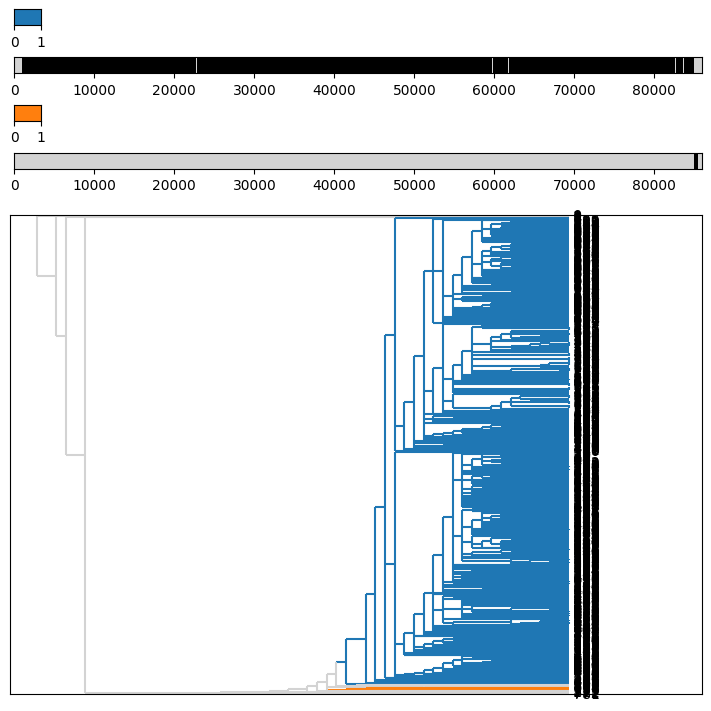

Subtree: [0]
None


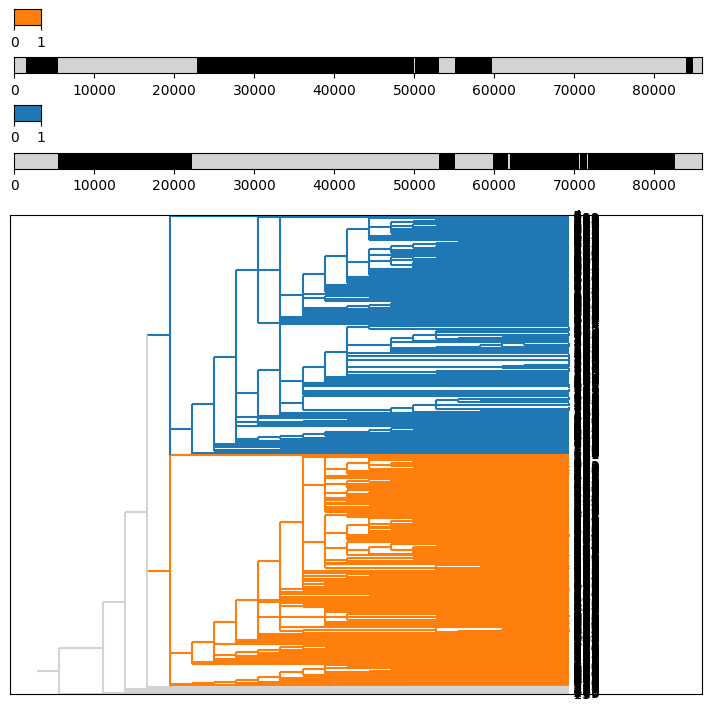

Subtree: [0, 0]
None


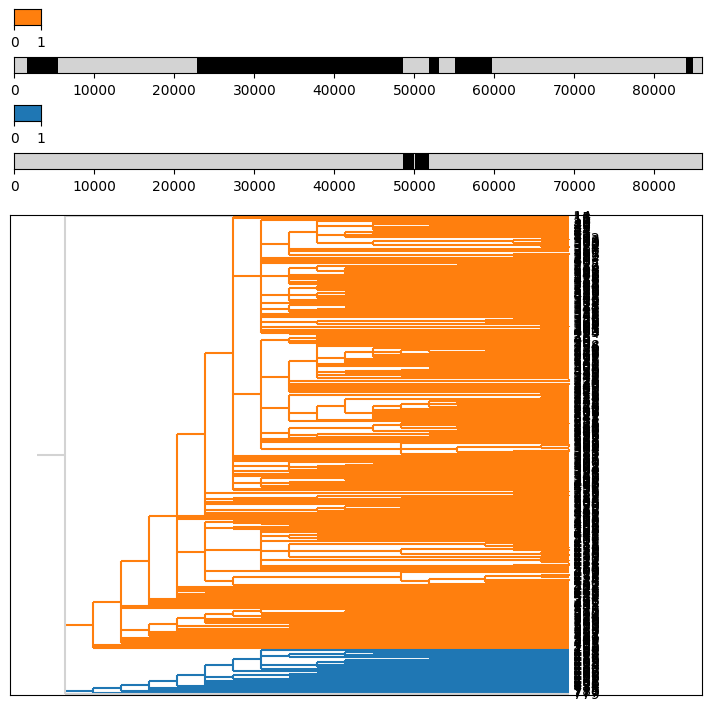

Subtree: [0, 0, 0]
None


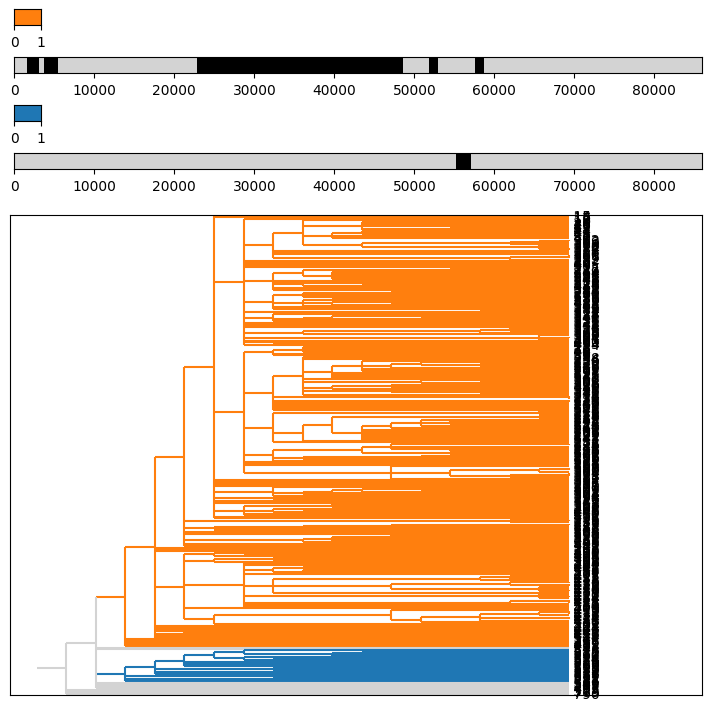

Subtree: [0, 0, 0, 0]
None


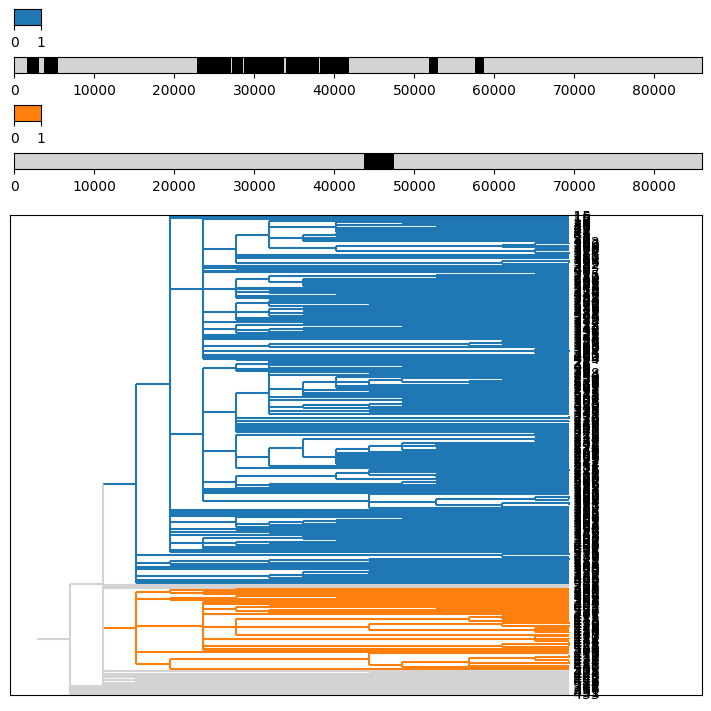

Subtree: [0, 0, 0, 0, 0]
None


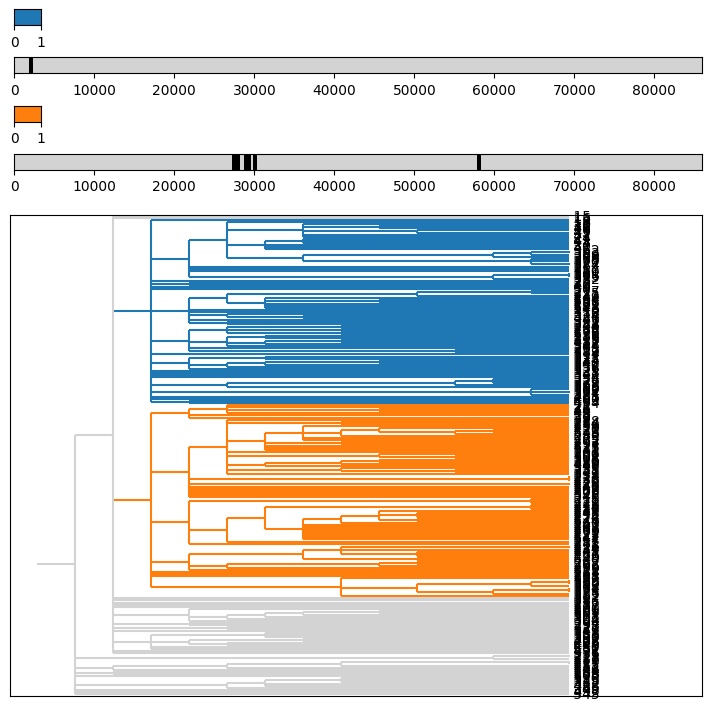

Subtree: [0, 1]
None


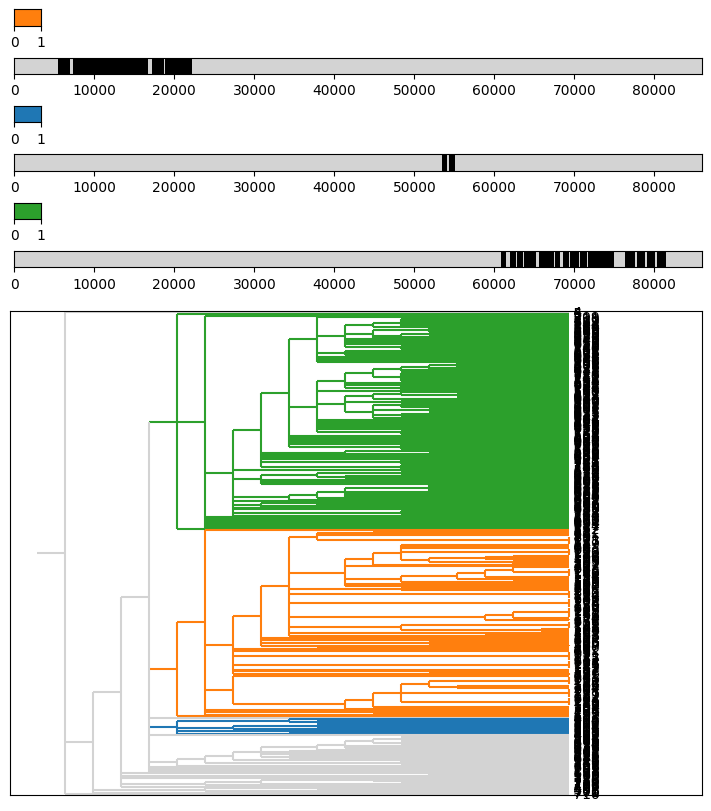

Subtree: [0, 1, 0]
None


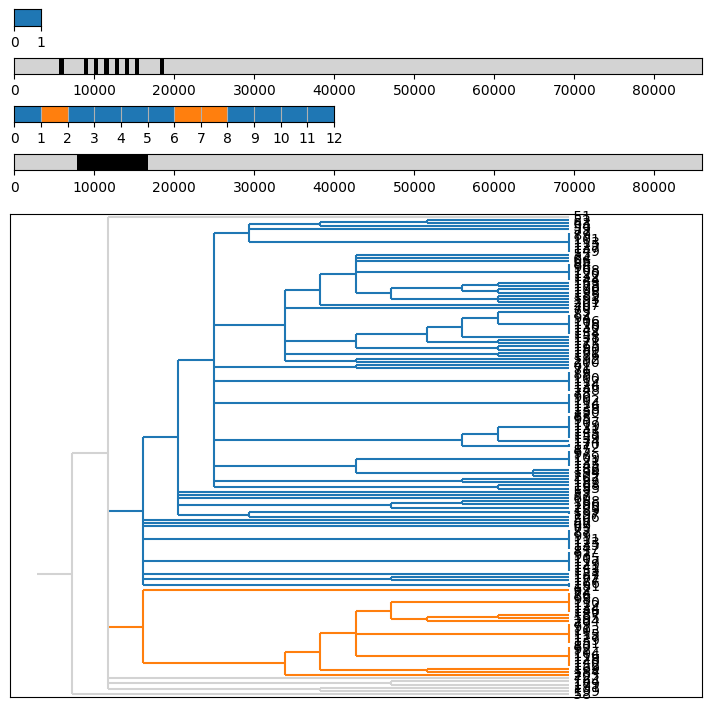

Subtree: [0, 1, 0, 1]
None


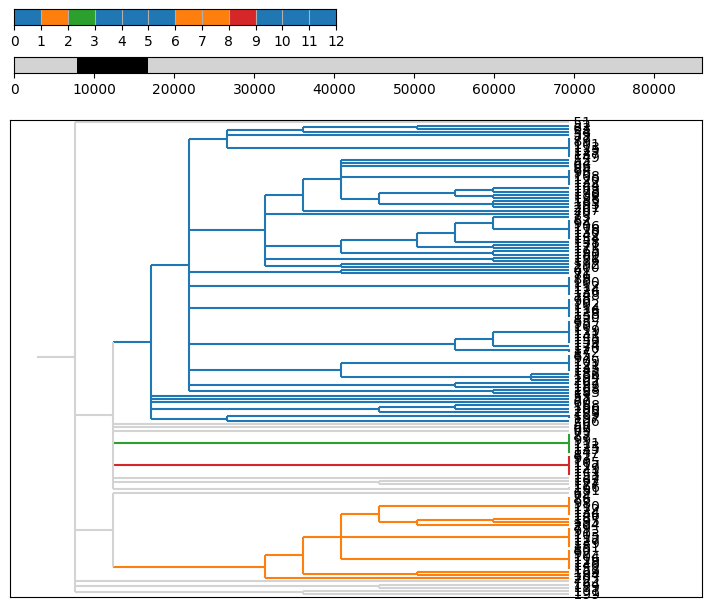

Subtree: [0, 1, 2]
None


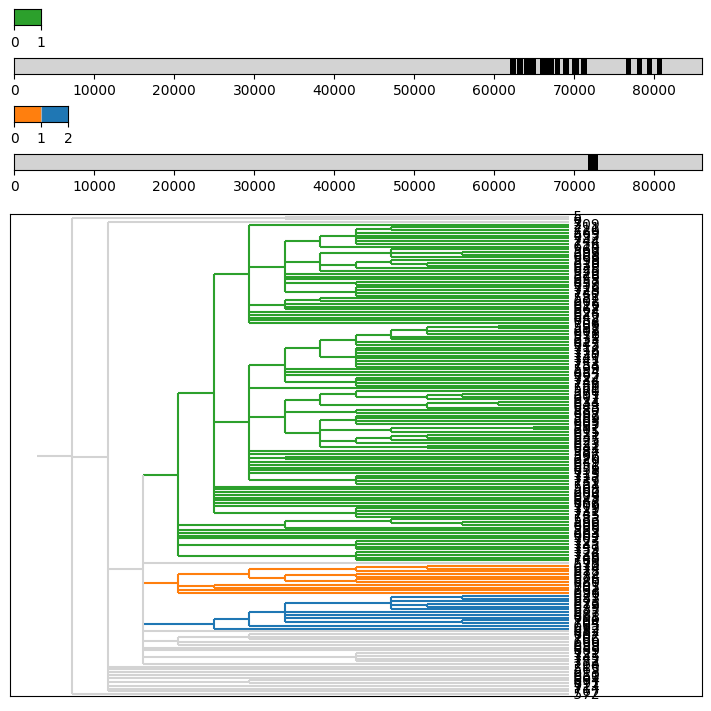

In [14]:
show_hor_tree(hor_tree_root, tree)

None


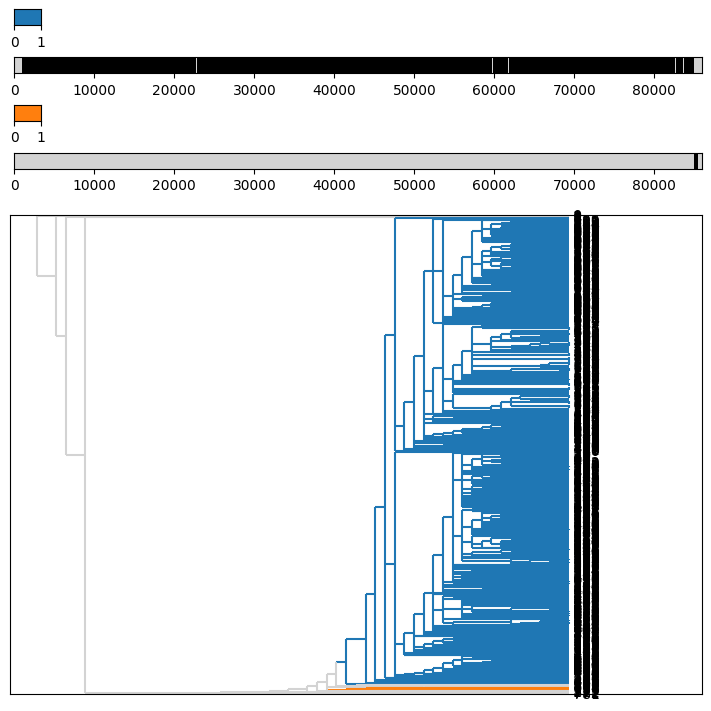

In [15]:
show_hors(hor_tree_root.sub_hors, tree)

In [17]:
actual_hors = [hor for hor in hors if len(hor.hor.clade_seq) > 1]

In [18]:
#for index, hor in enumerate(actual_hors):
#    show_hor(hor, tree, label=index)

In [19]:
tree_output_filename = f'data/vitis/clusterings/{seq_record.id.replace(":","_")}.tree.xml'
Phylo.write(tree, tree_output_filename, format='phyloxml')

1